# Exercise 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


pd.set_option('display.float_format', lambda x: '%.5f' % x)

## a) tabulation

In [4]:
df = pd.read_csv("../data/Youtube_Statistics_full.csv", encoding_errors = 'replace', encoding = 'utf-8', delimiter=';', low_memory=False)
df.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
69819,BHj-6mEiyQs,18.27.04,NEWCOMER MIT DEM BESTEM BATTLE DER RAP AM MITT...,Rainer Wahnsinn,24.00000,01.04.2018 16:16,"skilla199 vs dizzepticon|""bestes freestyle bat...",10885.00000,353.00000,3.00000,17.00000,https://i.ytimg.com/vi/BHj-6mEiyQs/default.jpg,FALSCH,FALSCH,FALSCH,Skilla und Dizzepticon liefern sich eins der b...,Germany
225102,vUPs9rKJ8J4,18.09.06,Píntate La Cara Ft. Santimaye - Mauro Martínez...,Kika Nieto,26.00000,09.06.2018 00:15,"canción mundial|""cancion mundial""|""cancion ofi...",457807.00000,66692.00000,4465.00000,12531.00000,https://i.ytimg.com/vi/vUPs9rKJ8J4/default.jpg,FALSCH,FALSCH,FALSCH,Esta es nuestra canción oficial del mundial :)...,Mexico
55639,OG3Dy-FUxPs,18.08.2002,Koscher kochen und essen - Jüdischer Spezialit...,Galileo,24.00000,07.02.2018 12:30,Koscher kochen und essen - Jüdischer Spezialit...,72105.00000,1307.00000,333.00000,943.00000,https://i.ytimg.com/vi/OG3Dy-FUxPs/default.jpg,FALSCH,FALSCH,FALSCH,Wenn es um die Zubereitung und Einnahme ihrer ...,Germany
121277,DJXUWLs6FI0,17.26.11,Desus & Mero Announce A New Project,The Late Show with Stephen Colbert,24.00000,21.11.2017 09:35,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",111465.00000,1993.00000,65.00000,370.00000,https://i.ytimg.com/vi/DJXUWLs6FI0/default.jpg,FALSCH,FALSCH,FALSCH,'Desus & Mero' co-hosts Desus Nice and The Kid...,Great Britain
35189,C-AjcbVUq54,182505,The Last Days of Michael Jackson,The Wendy Williams Show,24.00000,25.05.2018 03:00,"michael jackson|""the wendy williams show""|""#yo...",103349.00000,2061.00000,180.00000,1093.00000,https://i.ytimg.com/vi/C-AjcbVUq54/default.jpg,FALSCH,FALSCH,FALSCH,The Jackson estate doesn't want you to see ton...,Canada
22394,wItohUpe_CI,181303,Lucky People Who Found the Best Things in Thri...,Be Amazed,24.00000,10.03.2018 23:46,"beamazed|""be amazed""|""top 10""|""charity shop""|""...",309510.00000,4165.00000,190.00000,541.00000,https://i.ytimg.com/vi/wItohUpe_CI/default.jpg,FALSCH,FALSCH,FALSCH,Finding valuable stuff in thrift shops is amaz...,Canada
178151,8JfMdhrbehY,18.25.04,Markiplier Animated | GHOST HUNTER,Markiplier,20.00000,2018-04-18T18:00:00.000Z,"markiplier|""markiplier animated""|""animation""|""...",972047.00000,45508.00000,953.00000,2840.00000,https://i.ytimg.com/vi/8JfMdhrbehY/default.jpg,FALSCH,FALSCH,FALSCH,Markiplier steps inside Luigi's Mansion to tak...,USA
145669,fQjGRb4-IQM,18.10.2005,Cats always find a way \ Разошлись,ignoramusky,15.00000,11.04.2018 23:45,"cats|""funny""|""pets""|""animals""|""kitten""|""two ca...",577697.00000,6297.00000,212.00000,390.00000,https://i.ytimg.com/vi/fQjGRb4-IQM/default.jpg,FALSCH,FALSCH,FALSCH,"Two cats are stuck, but there is always a way out",Great Britain
145224,Qi7t_g5QObs,18.06.2005,The Hobbit: The Desolation of Warners (Part 3/2),Lindsay Ellis,24.00000,20.04.2018 12:09,"the hobbit review|""lindsay ellis hobbit""|""pete...",479427.00000,31543.00000,654.00000,5014.00000,https://i.ytimg.com/vi/Qi7t_g5QObs/default.jpg,FALSCH,FALSCH,FALSCH,Nothing is pure.,Great Britain
63066,2Mjw-Mb7PW4,18.18.03,Neumondorakel 17. bis 30. März 2018,Nadine Breitenstein,22.00000,17.03.2018 18:08,"Wochenorakel|""Liebesorakel""|""Singleorakel""|""Wu...",6527.00000,210.00000,14.00000,0.00000,https://i.ytimg.com/vi/2Mjw-Mb7PW4/default.jpg,WAHR,FALSCH,FALSCH,Hier könnt ihr eine Herzöffnung für euren Wuns...,Germany


In [5]:
# fill empty country values in col "COUNTRY"
df["Country"].fillna("No Country", inplace=True)

In [6]:
# tabulation per country
df_country_tabulation = pd.DataFrame(
    {
        "count": df["Country"].value_counts(),
        "share": df["Country"].value_counts(normalize=True),
    }
)

df_country_tabulation

,count,share
France,40213,0.17781
Mexico,40099,0.17730
Germany,40014,0.17693
Canada,39086,0.17282
USA,36761,0.16254
Great Britain,29980,0.13256
No Country,10,0.00004


## b)

In [7]:
df_views = pd.Series(df["views"])
# check for NaN
df_views.isna().sum()

10

In [8]:
# drop NaN values
df_views.dropna(inplace=True)
df_views.isnull().sum()

0

In [9]:
# have a look at the data
df_views.describe()

count    226153.00000
mean     556551.02900
std      836232.17738
min         157.00000
25%       46019.00000
50%      199221.00000
75%      672071.00000
max     4994034.00000
Name: views, dtype: float64

Here we measure **location** statistics:

In [10]:
df_views_sorted = df_views.sort_values(ascending=True)
trimmed_mean = stats.trim_mean(df_views_sorted, 0.2)
views_mode = df_views.mode()
views_median = df_views.median()
views_mean = df_views.mean()

print(f"Trimmed mean with 20 % cuttoff of youtube views is: {trimmed_mean}\nMedian: {views_median}\nMean: {views_mean}\nModes: \n{views_mode}")

Trimmed mean with 20 % cuttoff of youtube views is: 273909.66089628794
Median: 199221.0
Mean: 556551.0289980677
Modes: 
0   3778.00000
1   6573.00000
Name: views, dtype: float64


/tmp/ipykernel_38488/352505491.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


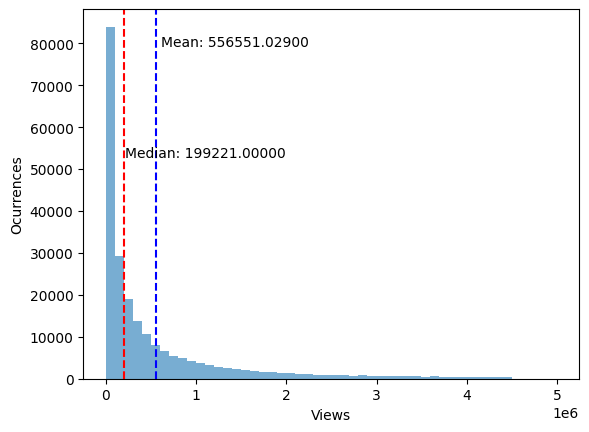

In [11]:
# show graphical representations of the distribution
#df_views.count()
fig, ax = plt.subplots(1)
n, bins, patches = ax.hist(df_views, bins = 50, alpha = 0.6)
ax.set_ylabel("Ocurrences")
ax.set_xlabel("Views")
ax.axvline(views_mean, linestyle = "dashed", color = "b")
min_ylim, max_ylim = plt.ylim()
ax.text(views_mean *1.1, max_ylim *0.9, 'Mean: {:.5f}'.format(views_mean))
ax.axvline(views_median, linestyle = "dashed", color = "r")
#min_ylim_2, max_ylim_2 = plt.ylim()
ax.text(views_median *1.1, max_ylim *0.6, 'Median: {:.5f}'.format(views_median))
fig.show()

Here we measure **spread** statistics:

In [12]:
variance_views = df_views.var(skipna=True)
std_deviation_views = np.sqrt(variance_views)
std_deviation_views
quarter =df_views.quantile(0.25)
three_quarter = df_views.quantile(0.75)
iqr = three_quarter - quarter  
print(f"Interquartile range for views is: {iqr}")


Interquartile range for views is: 626052.0


Next, we calculate **skewness** of the distribution:

In [22]:
skew = (views_mean -views_median) / std_deviation_views
skew
kurtosis = views_mean**4 / std_deviation_views**4
print(f" Skew is: {skew} which indicates our distribution is not normally distributed (confirmed by histogram above) and skewed to the left. \n Kurtosis is : {kurtosis} which means our distribution is platykurtic, therefore we have few outliers and is light-tailed.")

 Skew is: 0.42730959016205744 which indicates our distribution is not normally distributed (confirmed by histogram above) and skewed to the left. 
 Kurtosis is : 0.19620608003227535 which means our distribution is platykurtic, therefore we have few outliers and is light-tailed.


## c

In [40]:
countries = df["Country"].unique()
likes = df.groupby(by="Country")["likes"]
trimmed_means_like = pd.Series(data = [0,0,0,0,0,0,0], index = countries) #buffer for trimmed_means

for country in countries:
    buf_df = likes.get_group(country) # get data for each country
    buf_df.sort_values(ascending=True) #sort data of current country
    trimmed_means_like[country] = stats.trim_mean(buf_df, 0.2) #compute trimmed mean for current country


print("here we have trimmed means with 20% cutoff in front ")
trimmed_means_like
#likes.mean()

here we have trimmed means with 20% cutoff in front 


Canada          10372.81370
Germany          3978.42799
France           2785.73099
Great Britain   18396.69619
USA             18119.04520
Mexico           2272.12676
No Country              NaN
dtype: float64